Flora Business Case
@author : Yuan Ning Chiang

In the business case we are building up the model for predicting customer type as 'Personal' or 'Wholesaler' in the client customer and invoice transaction database.

In [47]:
# importing all libraries needed

import pandas as pd                # data science essentials
import matplotlib.pyplot as plt     # essential graphical output
import seaborn as sns               # enhanced graphical output
import numpy as np                   # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.linear_model import LogisticRegression # (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './__datasets/H_RETAIL_T17_2_csv.xml.csv'

# reading the file into Python
H_Retail = pd.read_csv(filepath_or_buffer = file)

# outputting the first ten rows of the dataset
H_Retail.head(n = 10)



,customer_id,sex_at_birth,birthdate,occupation,employment_type,country,Wholesale/ Retail,education,race,marital_status,relationship_in_household,quantity,price
0,193585125,M,1970-08-09,Exec-managerial,Private,United-States,NaN,Bachelors,Amer-Indian-Eskimo,Divorced,Not-in-family,301,3.908571
1,322744865,F,1981-01-20,Handlers-cleaners,Private,United-States,NaN,Some-college,Amer-Indian-Eskimo,Divorced,Not-in-family,158,3.712821
2,719649470,M,1993-11-19,Other-service,Private,United-States,NaN,HS-grad,Amer-Indian-Eskimo,Never-married,Not-in-family,91,5.020417
3,798017171,F,1966-11-27,Exec-managerial,State-gov,United-States,NaN,Assoc-voc,Amer-Indian-Eskimo,Widowed,Not-in-family,464,4.144091
4,857511201,F,1958-02-24,?,?,United-States,NaN,Bachelors,Amer-Indian-Eskimo,Widowed,Not-in-family,269,12.833333
5,1444144237,F,1974-03-29,Exec-managerial,Private,United-States,NaN,HS-grad,Amer-Indian-Eskimo,Divorced,Not-in-family,101,2.646744
6,1730964017,F,1984-04-30,Tech-support,Private,United-States,Wholesaler,Some-college,Amer-Indian-Eskimo,Divorced,Not-in-family,92,2.060870
7,2726220312,F,1996-08-03,Adm-clerical,Local-gov,United-States,Wholesaler,HS-grad,Amer-Indian-Eskimo,Divorced,Not-in-family,122,1.621429
8,3269835226,F,1997-01-07,Exec-managerial,Private,United-States,Wholesaler,HS-grad,Amer-Indian-Eskimo,Divorced,Not-in-family,197,3.394186
9,3396341469,M,1993-04-15,Craft-repair,Private,United-States,Wholesaler,Assoc-voc,Amer-Indian-Eskimo,Divorced,Not-in-family,100,1.944444


In [48]:
#Exploring the dataset by using .shape to view (ROWS, COLUMNS)

H_Retail.shape

(4098, 13)

In [49]:
# formatting and printing the dimensions of the dataset

print(f"""
Size of Original Dataset
------------------------
Observations: {H_Retail.shape[0]}
Features:     {H_Retail.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 4098
Features:     13



In [50]:
# looping to print each column names 

for column in H_Retail:
    print(column)

customer_id
sex_at_birth
birthdate
occupation
employment_type
country
Wholesale/ Retail
education
race
marital_status
relationship_in_household
quantity
price


In [51]:
# displaying the LAST 5 rows of the DataFrame
H_Retail.tail(n = 5)

,customer_id,sex_at_birth,birthdate,occupation,employment_type,country,Wholesale/ Retail,education,race,marital_status,relationship_in_household,quantity,price
4093,2141714795,M,1990-01-25,Other-service,Private,United-States,NaN,HS-grad,Other,Married-civ-spouse,Husband,2551,4.058222
4094,3053857774,M,1978-03-22,Prof-specialty,Private,United-States,NaN,Masters,Other,Married-civ-spouse,Husband,2923,2.091544
4095,3851308699,M,1993-02-10,Sales,Private,?,NaN,Some-college,Other,Married-civ-spouse,Husband,26,4.118000
4096,3867541920,M,1989-11-14,Sales,Private,Puerto-Rico,NaN,Bachelors,Other,Married-civ-spouse,Husband,88,4.785556
4097,4247216797,M,1969-10-16,Farming-fishing,Private,Mexico,NaN,HS-grad,Other,Married-civ-spouse,Husband,2060,2.835652


In [52]:
# Information about each variable
H_Retail.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4098 entries, 0 to 4097
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                4098 non-null   int64  
 1   sex_at_birth               4098 non-null   object 
 2   birthdate                  4098 non-null   object 
 3   occupation                 4098 non-null   object 
 4   employment_type            4098 non-null   object 
 5   country                    4098 non-null   object 
 6   Wholesale/ Retail          980 non-null    object 
 7   education                  4098 non-null   object 
 8   race                       4098 non-null   object 
 9   marital_status             4098 non-null   object 
 10  relationship_in_household  4098 non-null   object 
 11  quantity                   4098 non-null   int64  
 12  price                      4098 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage

The H_Retail data set appears to have a mix of data types as seen above. More analysis of the data set is needed to develop a machine learning model for classification.

In [53]:
# Value counts of the categorical variables of interest and printing the columns

print(f"""
Gender
------
{H_Retail['sex_at_birth'].value_counts()}


Occupation
----------
{H_Retail['occupation'].value_counts()}


Employment Type
-------------
{H_Retail['employment_type'].value_counts()}


Wholesale/ Retail
-------------
{H_Retail['Wholesale/ Retail'].value_counts()}


education
-------------
{H_Retail['education'].value_counts()}


Marital Status
-------------
{H_Retail['marital_status'].value_counts()}


relationship_in_household
-------------
{H_Retail['relationship_in_household'].value_counts()}


""")


Gender
------
M    2762
F    1336
Name: sex_at_birth, dtype: int64


Occupation
----------
Craft-repair         521
Prof-specialty       515
Exec-managerial      490
Sales                489
Adm-clerical         486
Other-service        398
Machine-op-inspct    251
?                    245
Transport-moving     212
Handlers-cleaners    163
Farming-fishing      125
Tech-support         108
Protective-serv       78
Priv-house-serv       17
Name: occupation, dtype: int64


Employment Type
-------------
Private             2831
Self-emp-not-inc     334
Local-gov            258
?                    244
Self-emp-inc         160
State-gov            157
Federal-gov          113
Never-worked           1
Name: employment_type, dtype: int64


Wholesale/ Retail
-------------
Wholesaler    809
Personal      171
Name: Wholesale/ Retail, dtype: int64


education
-------------
HS-grad         1333
Some-college     949
Bachelors        646
Masters          211
Assoc-voc        175
11th             140

In [54]:
# Proportion of the counts of the categorical variables of interest and printing the columns
# Rounding to two decimal places


print(f"""
Gender
------
{pd.DataFrame(H_Retail['sex_at_birth'].value_counts(normalize = True)).round(decimals = 2)}


Occupation
----------
{pd.DataFrame(H_Retail['occupation'].value_counts(normalize = True)).round(decimals = 2)}


Employment Type
-------------
{pd.DataFrame(H_Retail['employment_type'].value_counts(normalize = True)).round(decimals = 2)}


Wholesale/ Retail
-------------
{pd.DataFrame(H_Retail['Wholesale/ Retail'].value_counts(normalize = True)).round(decimals = 2)}


education
-------------
{pd.DataFrame(H_Retail['education'].value_counts(normalize = True)).round(decimals = 2)}


Marital Status
-------------
{pd.DataFrame(H_Retail['marital_status'].value_counts(normalize = True)).round(decimals = 2)}


relationship_in_household
-------------
{pd.DataFrame(H_Retail['relationship_in_household'].value_counts(normalize = True)).round(decimals = 2)}


""")




Gender
------
   sex_at_birth
M          0.67
F          0.33


Occupation
----------
                   occupation
Craft-repair             0.13
Prof-specialty           0.13
Exec-managerial          0.12
Sales                    0.12
Adm-clerical             0.12
Other-service            0.10
Machine-op-inspct        0.06
?                        0.06
Transport-moving         0.05
Handlers-cleaners        0.04
Farming-fishing          0.03
Tech-support             0.03
Protective-serv          0.02
Priv-house-serv          0.00


Employment Type
-------------
                  employment_type
Private                      0.69
Self-emp-not-inc             0.08
Local-gov                    0.06
?                            0.06
Self-emp-inc                 0.04
State-gov                    0.04
Federal-gov                  0.03
Never-worked                 0.00


Wholesale/ Retail
-------------
            Wholesale/ Retail
Wholesaler               0.83
Personal                 0.17



From analyzing the proportion of the H_Retail dataset, it is observed that 6% of the occupation and Employment Type were not specified.

In [55]:
# checking the H_Retail dataset to see if a value is_null( ). 
# wrapping a print() statement around the method chaining!

print(H_Retail.isnull().sum(axis = 0))

customer_id                     0
sex_at_birth                    0
birthdate                       0
occupation                      0
employment_type                 0
country                         0
Wholesale/ Retail            3118
education                       0
race                            0
marital_status                  0
relationship_in_household       0
quantity                        0
price                           0
dtype: int64


In [56]:
# Displaying the proportion of missing values percentage of total observations per feature
#Rounding to two decimal places

print(H_Retail.isnull().mean(axis = 0).round(decimals = 2))


customer_id                  0.00
sex_at_birth                 0.00
birthdate                    0.00
occupation                   0.00
employment_type              0.00
country                      0.00
Wholesale/ Retail            0.76
education                    0.00
race                         0.00
marital_status               0.00
relationship_in_household    0.00
quantity                     0.00
price                        0.00
dtype: float64


76% of missing data observed for Wholesale/Retail. Classification model needed to determine the customer class.

In [58]:
# Transforming data with new variable "Revenue"
H_Retail['revenue'] = H_Retail["price"] * H_Retail["quantity"]


In [59]:
# log transforming revenue and saving it to the dataset

H_Retail['log_revenue'] = np.log(H_Retail['revenue'])

#checking for new variable and print information
H_Retail.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4098 entries, 0 to 4097
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                4098 non-null   int64  
 1   sex_at_birth               4098 non-null   object 
 2   birthdate                  4098 non-null   object 
 3   occupation                 4098 non-null   object 
 4   employment_type            4098 non-null   object 
 5   country                    4098 non-null   object 
 6   Wholesale/ Retail          980 non-null    object 
 7   education                  4098 non-null   object 
 8   race                       4098 non-null   object 
 9   marital_status             4098 non-null   object 
 10  relationship_in_household  4098 non-null   object 
 11  quantity                   4098 non-null   int64  
 12  price                      4098 non-null   float64
 13  revenue                    4098 non-null   float

/Users/aojei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [68]:
# Data Massaging
# removing the original categorical columns using drop

# Removing some categorical variables
retail_data   = H_Retail.drop(['occupation','employment_type',
                            'country','education',
                            'race','relationship_in_household',
                            'birthdate'],
                                axis = 1)
#showing the first 5 rows
retail_data.head(n= 5)

,customer_id,sex_at_birth,Wholesale/ Retail,marital_status,quantity,price,revenue,log_revenue
0,193585125,M,NaN,Divorced,301,3.908571,1176.479871,7.070282
1,322744865,F,NaN,Divorced,158,3.712821,586.625718,6.374387
2,719649470,M,NaN,Never-married,91,5.020417,456.857947,6.124373
3,798017171,F,NaN,Widowed,464,4.144091,1922.858224,7.561568
4,857511201,F,NaN,Widowed,269,12.833333,3452.166577,8.146757


In [69]:
# printing columns

print(f"""
Gender
------
{retail_data['sex_at_birth'].value_counts()}

Marital Status
-------------
{retail_data['marital_status'].value_counts()}
""")


Gender
------
M    2762
F    1336
Name: sex_at_birth, dtype: int64

Marital Status
-------------
Married-civ-spouse       1870
Never-married            1362
Divorced                  561
Separated                 136
Widowed                   113
Married-spouse-absent      53
Married-AF-spouse           3
Name: marital_status, dtype: int64



In [70]:
#combine married_civ_spous, Married-spouse-absent and Married-AF-spouse in the marital status
# by using for loops and if conditional function
# becuase the numbers of each category cannot be less than 100
for index, value in retail_data.iterrows():

    if retail_data.loc[index,'marital_status'] == "Married-AF-spouse":
         retail_data.loc[index,'marital_status'] = "Married"
    
    if retail_data.loc[index,'marital_status']=="Married-spouse-absent":
         retail_data.loc[index,'marital_status'] = "Married"
       
    if retail_data.loc[index,'marital_status']=="Married-civ-spouse":
         retail_data.loc[index,'marital_status'] = "Married"

In [71]:
# checking the value in marital status after transformation

retail_data['marital_status'].value_counts()


Married          1926
Never-married    1362
Divorced          561
Separated         136
Widowed           113
Name: marital_status, dtype: int64

In [72]:
# Get dummies for gender and marital status

gender            = pd.get_dummies(retail_data['sex_at_birth'])
marital_status    = pd.get_dummies(retail_data['marital_status'])

# dropping categorical variables after they've been encoded
retail_data = retail_data.drop('sex_at_birth', axis = 1)
retail_data = retail_data.drop('marital_status', axis = 1)

# joining codings together with dummies
retail_data = retail_data.join([gender, marital_status])

#print the first 5 rows
print(retail_data.shape)
retail_data.head(n=5)

(4098, 13)


,customer_id,Wholesale/ Retail,quantity,price,revenue,log_revenue,F,M,Divorced,Married,Never-married,Separated,Widowed
0,193585125,NaN,301,3.908571,1176.479871,7.070282,0,1,1,0,0,0,0
1,322744865,NaN,158,3.712821,586.625718,6.374387,1,0,1,0,0,0,0
2,719649470,NaN,91,5.020417,456.857947,6.124373,0,1,0,0,1,0,0
3,798017171,NaN,464,4.144091,1922.858224,7.561568,1,0,0,0,0,0,1
4,857511201,NaN,269,12.833333,3452.166577,8.146757,1,0,0,0,0,0,1


In [73]:
# Remove Female as female has lower numbers compared to male 
retail_data = retail_data.drop(['F'], axis=1)

# Remove Widowed as widowed has the lowest numbers in marital status
retail_data = retail_data.drop(['Widowed'], axis=1)

#print the first 5 rows
retail_data.head(n=5)

,customer_id,Wholesale/ Retail,quantity,price,revenue,log_revenue,M,Divorced,Married,Never-married,Separated
0,193585125,NaN,301,3.908571,1176.479871,7.070282,1,1,0,0,0
1,322744865,NaN,158,3.712821,586.625718,6.374387,0,1,0,0,0
2,719649470,NaN,91,5.020417,456.857947,6.124373,1,0,0,1,0
3,798017171,NaN,464,4.144091,1922.858224,7.561568,0,0,0,0,0
4,857511201,NaN,269,12.833333,3452.166577,8.146757,0,0,0,0,0


In [74]:
#select all null value in the dataset
#drop the null and only leave the wholesale, retail(personal)

retail_null = retail_data.loc[:,:][retail_data['Wholesale/ Retail'].isna()]
retail_model = pd.concat([retail_data,retail_null]).drop_duplicates(keep=False)

#count and print the value
print(retail_model['Wholesale/ Retail'].value_counts())

#convert the wholesale and retail to binary, 0 and 1
#initiate an empty column
retail_model['wholesaler'] = 0

#using for loop to convert the wholeser into 1 as we want to predict wholesaler
for index, value in retail_model.iterrows():
    
    if retail_model.loc[index,'Wholesale/ Retail'] == "Wholesaler":
         retail_model.loc[index,'wholesaler'] = 1

retail_model = retail_model.drop(['Wholesale/ Retail'], axis=1)

#print the value of wholesaler and retailer after the 
print(retail_model['wholesaler'].value_counts())

Wholesaler    809
Personal      171
Name: Wholesale/ Retail, dtype: int64
1    809
0    171
Name: wholesaler, dtype: int64


In [75]:
#import the libraries
from sklearn.linear_model import LogisticRegression # for logistic regression
from sklearn import metrics # for confusion matrix
from sklearn.model_selection import train_test_split # for trainning and testing data split 

#define the target/variables that need to be predict 
retail_y = retail_model['wholesaler']
retail_x = retail_model.drop(['wholesaler','customer_id'], axis=1)

#putting the variables into the train_test function 
#testing sample size is 25%, set and set the seeds to get the higher number 
x_train, x_test, y_train, y_test = train_test_split(retail_x, retail_y, test_size=0.25, 
                random_state=219)

#call the logistic regression function
logreg = LogisticRegression()

#fit the logistic regression with the training and testing data
logreg_fit = logreg.fit(x_train, y_train)

#make the prediction
logreg_pred = logreg_fit.predict(x_test)

#print out the training and testing scores
print(logreg.score(x_train,y_train))
print(logreg.score(x_test,y_test))

# print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true = y_test, logreg_pred)
print(confusion_matrix)



0.8380952380952381
0.8448979591836735
[[  7  34]
 [  4 200]]


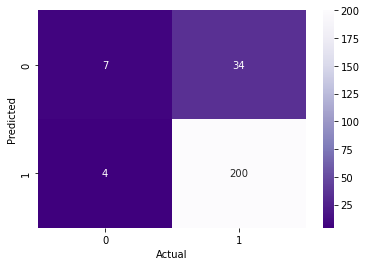

In [77]:
# plot the confusion matrix 
# visualization of the performance of classification model

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap= 'Purples_r')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()